### To save it in drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
my_local_drive= '/content/drive/My Drive/TER_M1/'
import sys
sys.path.append(my_local_drive)
%cd $my_local_drive

/content/drive/My Drive/TER_M1


# The main project

In [3]:
####  Load imports
import os
import string
import matplotlib
import matplotlib_inline
import numpy as np
import pandas as pd
import gensim.models
import nltk
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

matplotlib_inline
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

 In order to process this data model, we propose to consider each table as a symbol document and the set of tables as a collection of documents. A symbol can be a table’s name, a table’s attribute, or a relationship between two table (foreign key).

We model it by repeating (4 times in this case) the foreign key and the name of the source document in the target documents. We do the same for the name of the target documents in the source document.


In [4]:
#  read documents 
data = open("document_construction.txt", "r")

### Preprocessing

In [5]:
#    stop words
stop_words = set(stopwords.words('english'))

# punctuation
punctuation = set(string.punctuation)

# lemmatization

lemmatization = WordNetLemmatizer()

In [6]:
# function clean
def clean(documents):
    # split documents and remove stop words

    split_doc = " ".join([i for i in documents.lower().split() if i not in stop_words])

    # remove punctuation
    punc_doc = ''.join([j for j in split_doc if j not in punctuation])

    # normalize the text
    normalized = " ".join([lemmatization.lemmatize(word) for word in punc_doc.split()])

    return normalized

In [7]:
# clean documents in the file text

corpus = data
clean_documents = [clean(doc) for doc in corpus]

In [8]:
# Tables names 
Table_name = []

for doc in clean_documents:
     d=0
     if d==0:

       t= doc.split()[0] +" " +doc.split()[1]
       if doc.split()[0]!= doc.split()[1]:

           Table_name.append(t)
       else:
           Table_name.append(doc.split()[0])
       d=d+1

### CLUSTERING

TF-IDF Vectorization

In [9]:
tfidf_vectorizer = TfidfVectorizer(lowercase=False)

tf_idf = tfidf_vectorizer.fit_transform(clean_documents)
tf_idf

<14x96 sparse matrix of type '<class 'numpy.float64'>'
	with 162 stored elements in Compressed Sparse Row format>

In [10]:
#  view ressult
feature_names = tfidf_vectorizer.get_feature_names()
dense = tf_idf.todense()
denselist = dense.tolist()

all_key_words = []

for d in denselist:
    i = 0
    kwords = []

    for word in d:
        if word > 0:
            kwords.append(feature_names[i])
        i = i + 1
    all_key_words.append(kwords)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Elbow Method

In [11]:
wcss = []  # WCSS Scores = within-cluster-sum of squared distance
clusters_1 = range(1, 12)
for i in clusters_1:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=30, algorithm="elkan")
    kmeans.fit(tf_idf)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:968: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'full' instead.
  RuntimeWarning,


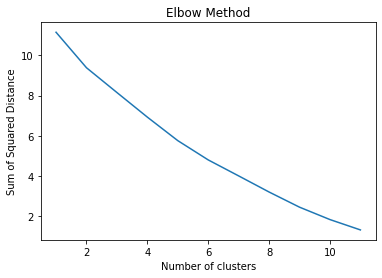

In [12]:
plt.plot(clusters_1, wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Distance')
plt.show()

Implementation of KMeans

In [13]:
clusters = 5  # modified for Petclinc data will be 3 or 2

model = KMeans(n_clusters=clusters, init="k-means++", max_iter=300, n_init=30, algorithm="elkan")

model.fit(tf_idf)

order_centroids = model.cluster_centers_.argsort()[:, ::-1]

terms = tfidf_vectorizer.get_feature_names()

labels = model.labels_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [14]:
for i in range(clusters):
  print(f" \n Cluster {i} \n")
  for ind in order_centroids[i, :10]:
      print(terms[ind])

 
 Cluster 0 

sequencelist
profile
exercice
refid
pid
author
exid
plagesession
profilelevel
exerciselevel
 
 Cluster 1 

nam
skill
exerciselevel
profilelevel
namid
pid
skillcode
profile
refcode
thid
 
 Cluster 2 

userid
userplage
psid
exerciseproduction
plagesession
exid
acquiredskill
usersession
exercice
studentstatement
 
 Cluster 3 

session
sid
sess
expire
exid
file
firstname
isfinal
issended
istimed
 
 Cluster 4 

userrole
userplage
roleid
theme
refid
acquiredskill
exerciceproduction
usersession
studentstatement
skill


In [15]:
#  Obtained Clusters

obtainesCluster =[]
print("Obtained Clusters: \n")
for c in range(clusters):
    print(" Cluster", c)
    print("__________________________________________")
    count = 0
    cluseterI =[]
    cluseterI.append(c)
    for i in labels:

        if i == c:
            print('Table: {} ---> Document {}'.format(Table_name[count], count))
            cluseterI.append(Table_name[count])
        count = count + 1

    obtainesCluster.append(cluseterI)
    print("__________________________________________")

Obtained Clusters: 

 Cluster 0
__________________________________________
Table: exercise exid ---> Document 1
Table: profile pid ---> Document 5
Table: sequencelist seqid ---> Document 7
__________________________________________
 Cluster 1
__________________________________________
Table: exerciselevel skillcode ---> Document 2
Table: nam namid ---> Document 4
Table: profilelevel pid ---> Document 6
Table: skill skillcode ---> Document 9
__________________________________________
 Cluster 2
__________________________________________
Table: acquiredskill userid ---> Document 0
Table: exerciseproduction epid ---> Document 3
Table: studentstatement psid ---> Document 10
Table: usersession userid ---> Document 13
__________________________________________
 Cluster 3
__________________________________________
Table: session sid ---> Document 8
__________________________________________
 Cluster 4
__________________________________________
Table: theme thid ---> Document 11
Table: userrol

In [16]:
print(" test:")
cc=0
for oc in obtainesCluster:
    print("\n cluseter",cc," -->",oc)
    cc= cc +1

 test:

 cluseter 0  --> [0, 'exercise exid', 'profile pid', 'sequencelist seqid']

 cluseter 1  --> [1, 'exerciselevel skillcode', 'nam namid', 'profilelevel pid', 'skill skillcode']

 cluseter 2  --> [2, 'acquiredskill userid', 'exerciseproduction epid', 'studentstatement psid', 'usersession userid']

 cluseter 3  --> [3, 'session sid']

 cluseter 4  --> [4, 'theme thid', 'userrole roleid']


Using PCA to reduces the dimensionality of a data set to an arbitrary number while preserving most of the information contained in it

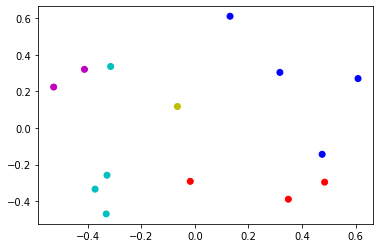

In [23]:
pca = PCA(n_components=2)

scatter_plot_points = pca.fit_transform(tf_idf.toarray())

colors = ["r", "b", "c", "y", "m", "g"]

X_axe = [i[0] for i in scatter_plot_points]
Y_axe = [i[1] for i in scatter_plot_points]

plt.scatter(X_axe, Y_axe, c=[colors[d] for d in labels])
plt.show()

**Using 3D visualization**


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  import sys


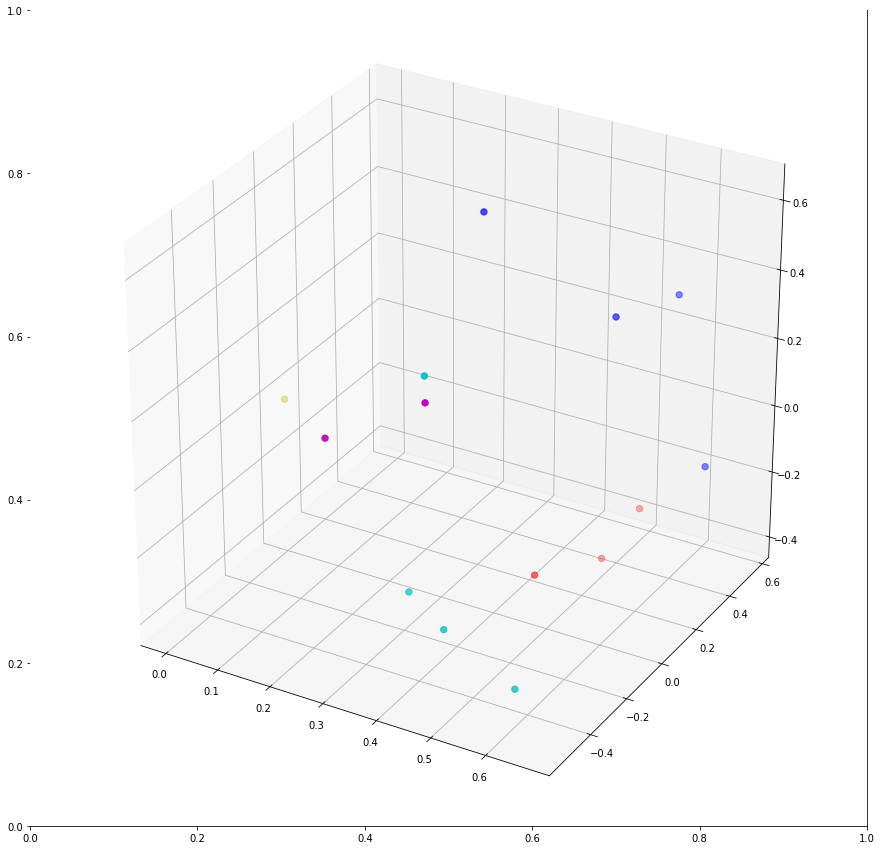

In [22]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=3)
X_svd = svd.fit_transform(tf_idf.toarray())
fig,ax = plt.subplots(figsize = (15,15))
ax = fig.gca(projection='3d')

ax.scatter(X_svd[:1000,0], X_svd[:1000,1], X_svd[:1000,2], zdir='z', s=40, depthshade=True, c=[colors[d] for d in labels])
plt.show()